### ** BONUS ** MAKING CSV FILE WITH 2025 GRAND FINAL RESULTS

In [2]:
import pandas as pd, numpy as np, seaborn as sbn, matplotlib.pyplot as plt

from Modules import utils as utl
from Modules import data_exploration as de
from Modules import machine_learning as ml
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import metrics
import pickle

In [3]:

# RESULTS FROM THIS LINK: https://eurovisionworld.com/eurovision/2025

# Creating a dictionary of the data
data = {
    "year": [2025] * 26,
    "final_draw_position": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
    "country": ["Norway", "Luxembourg", "Estonia", "Israel", "Lithuania", "Spain", "Ukraine", "United Kingdom", "Austria", "Iceland", 
                "Latvia", "Netherlands", "Finland", "Italy", "Poland", "Germany", "Greece", "Armenia", "Switzerland", "Malta", 
                "Portugal", "Denmark", "Sweden", "France", "San Marino", "Albania"],
    "final_televote_points": [67, 24, 258, 297, 62, 10, 158, 0, 178, 33, 42, 42, 108, 97, 139, 74, 126, 30, 0, 8, 13, 2, 195, 50, 18, 173],
    "final_jury_points": [22, 23, 98, 60, 34, 27, 60, 88, 258, 0, 116, 133, 88, 159, 17, 77, 105, 42, 214, 83, 37, 45, 126, 180, 9, 45],
    "final_place": [18, 22, 3, 2, 16, 24, 9, 19, 1, 25, 13, 12, 11, 5, 14, 15, 6, 20, 10, 17, 21, 23, 4, 7, 26, 8],
    "final_total_points": [89, 47, 356, 357, 96, 37, 218, 88, 436, 33, 158, 175, 196, 256, 156, 151, 231, 72, 214, 91, 50, 47, 321, 230, 27, 218]
}

df = pd.DataFrame(data)

# Save to CSV
# df.to_csv("Data/eurovision_2025_grand_final.csv", index=False)

df.head()

,year,final_draw_position,country,final_televote_points,final_jury_points,final_place,final_total_points
0,2025,1,Norway,67,22,18,89
1,2025,2,Luxembourg,24,23,22,47
2,2025,3,Estonia,258,98,3,356
3,2025,4,Israel,297,60,2,357
4,2025,5,Lithuania,62,34,16,96


#### Were the jury or televote most influenced by the running order in 2025?

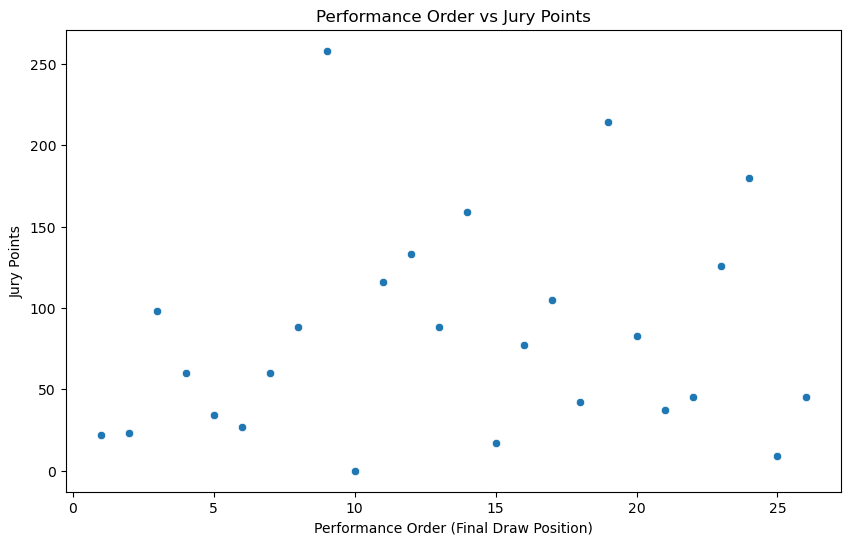

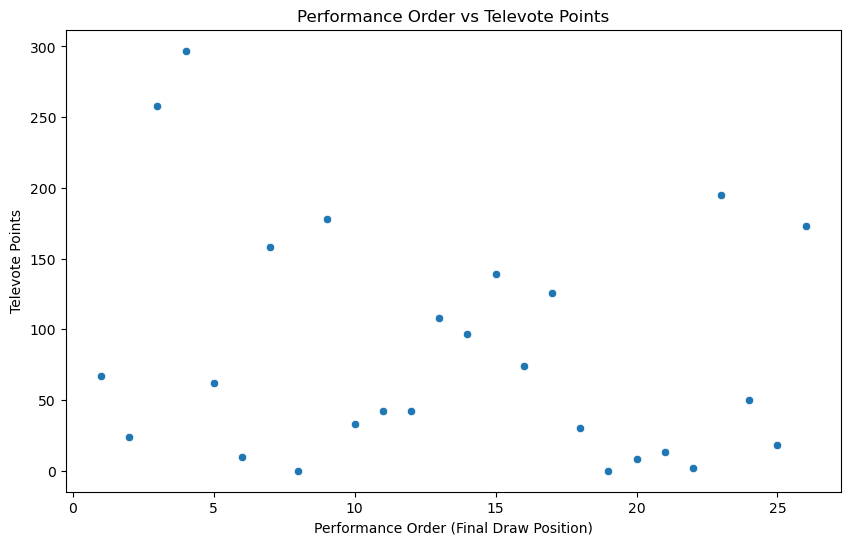

In [5]:
# Scatter plot of Performance Order vs Jury Points
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=df, x='final_draw_position', y='final_jury_points')
plt.title('Performance Order vs Jury Points')
plt.xlabel('Performance Order (Final Draw Position)')
plt.ylabel('Jury Points')
plt.show()

# Scatter plot of Performance Order vs Televote Points
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=df, x='final_draw_position', y='final_televote_points')
plt.title('Performance Order vs Televote Points')
plt.xlabel('Performance Order (Final Draw Position)')
plt.ylabel('Televote Points')
plt.show()

In [6]:
# Calculate the correlation between Performance Order and Jury Points
jurydf_corr = df[['final_draw_position', 'final_jury_points']].corr()
print("Correlation between Performance Order and Jury Points:")
print(jurydf_corr)

# Calculate the correlation between Performance Order and Televote Points
televotedf_corr = df[['final_draw_position', 'final_televote_points']].corr()
print("Correlation between Performance Order and Televote Points:")
print(televotedf_corr)


Correlation between Performance Order and Jury Points:
                     final_draw_position  final_jury_points
final_draw_position             1.000000           0.143012
final_jury_points               0.143012           1.000000
Correlation between Performance Order and Televote Points:
                       final_draw_position  final_televote_points
final_draw_position               1.000000              -0.219494
final_televote_points            -0.219494               1.000000


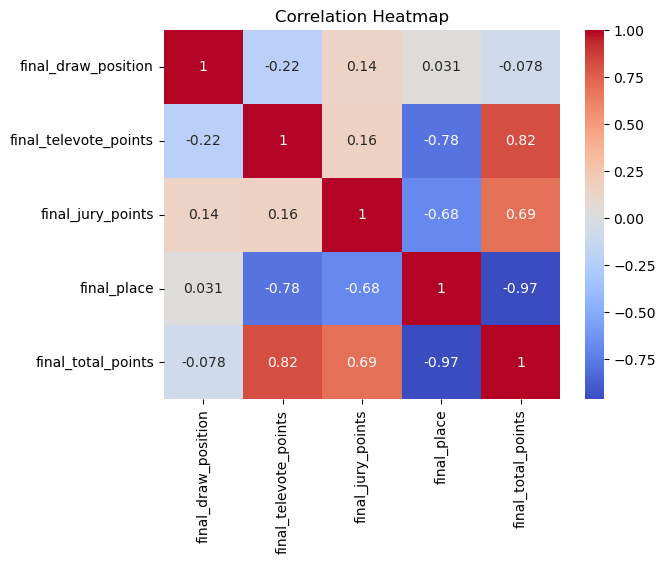

In [7]:
dropped_column = ['country', 'year']
df_numerals = df.drop(columns=dropped_column)
de.vs.correlation_heatmap(df_numerals)

In [8]:
df_numerals.describe()

,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,84.769231,82.538462,13.500000,167.307692
std,7.648529,82.916009,65.274945,7.648529,113.449114
min,1.000000,0.000000,0.000000,1.000000,27.000000
25%,7.250000,19.500000,34.750000,7.250000,76.000000
50%,13.500000,56.000000,68.500000,13.500000,157.000000
75%,19.750000,135.750000,113.250000,19.750000,227.000000
max,26.000000,297.000000,258.000000,26.000000,436.000000


<Figure size 600x400 with 0 Axes>

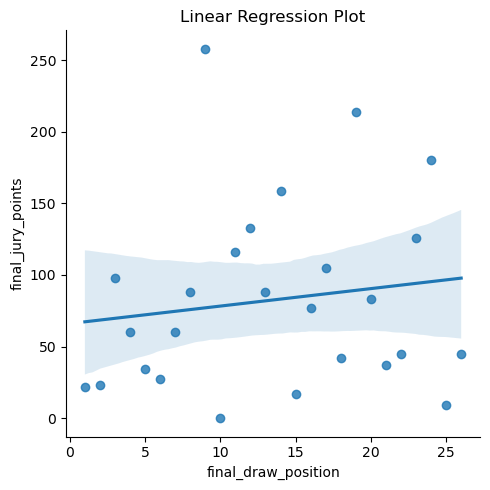

In [9]:
de.vs.lmplot(df_numerals, 'final_draw_position', 'final_jury_points')


<Figure size 600x400 with 0 Axes>

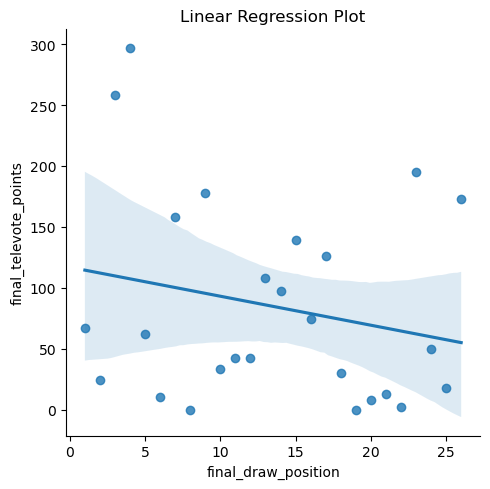

In [10]:
de.vs.lmplot(df_numerals, 'final_draw_position', 'final_televote_points')


##### So from this data and the linear regression plots, it appears that this year juries gave more points to songs later in the running order (0.143012 = 14,3% more points for every song that has performed before you), while televote gave more points to songs earlier in the running order (-0.219494 = 21,2% less points for every song that has performed before you). So compared to the general Jury vs Televote running order analysis, this has the opposite result, which means that the tendency of the televote favoring later songs is not necessarily reflected on the overall results every year. Also to keep in mind - the televote's top 2 each performed as number 3 and 4, which has definitely skewed the results towards more points for an earlier running order.